In [70]:
#Import dependency
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from datetime import datetime
import requests
import psycopg2
# import config as creds
import csv


In [71]:
df = pd.read_csv('Resources/airbnb_cleansed_df.csv')
df.head()


,_id,id,listing_url,host_response_rate,host_acceptance_rate,host_picture_url,street,neighbourhood_cleansed,latitude,longtitude,...,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator,comments
0,60f9849930e6339dfd92b1b8,13624476,https://www.airbnb.com/rooms/13624476,100,100,https://a2.muscache.com/im/pictures/85546a19-c...,"Commercial Street, Boston, MA 02109, United St...",North End,42.366226,-71.052250,...,0,0,0,0,0,0,0,0,0,NaN
1,60f9849930e6339dfd92b1a7,1692573,https://www.airbnb.com/rooms/1692573,100,100,https://a2.muscache.com/im/users/8814724/profi...,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,42.313379,-71.117189,...,0,0,0,0,0,1,0,0,0,My sister and I ( 30) stayed with our elderly ...
2,60f9849930e6339dfd92b1c4,14873100,https://www.airbnb.com/rooms/14873100,92,100,https://a0.muscache.com/im/users/26098645/prof...,"Dexter Street, Boston, MA 02127, United States",South Boston,42.331079,-71.056957,...,0,0,0,0,0,1,1,0,0,NaN
3,60f9849930e6339dfd92b1cb,5867761,https://www.airbnb.com/rooms/5867761,0,0,https://a2.muscache.com/im/pictures/f3de98b7-f...,"Union Park Street, Boston, MA 02118, United St...",South End,42.343106,-71.068970,...,0,0,0,0,0,0,0,0,0,NaN
4,60f9849930e6339dfd92b1da,1321422,https://www.airbnb.com/rooms/1321422,100,100,https://a2.muscache.com/im/users/6608084/profi...,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,42.308380,-71.046943,...,0,0,0,0,0,1,0,1,0,Barney met U.S. and showed us around the entir...


In [72]:
df.describe()

,id,host_response_rate,host_acceptance_rate,latitude,longtitude,accomodates,bathrooms,bedrooms,beds,price,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
count,3.585000e+03,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3585.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,8.440875e+06,82.509344,73.114365,42.340032,-71.084818,3.041283,1.216876,1.252441,1.605021,173.925802,...,0.132218,0.04463,0.505160,0.133612,0.041283,0.509902,0.675314,0.553696,0.296513,0.242120
std,4.500787e+06,34.147951,34.939621,0.024403,0.031565,1.778929,0.506275,0.754921,1.013677,148.331321,...,0.338774,0.20652,0.500043,0.340283,0.198972,0.499972,0.468323,0.497178,0.456784,0.428426
min,3.353000e+03,0.000000,0.000000,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.679319e+06,89.000000,55.000000,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,85.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.577620e+06,100.000000,91.000000,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,150.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.278953e+07,100.000000,100.000000,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,220.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.493346e+07,100.000000,100.000000,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,4000.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#dropping any NA before putting the dataset into our model
df = df.dropna()
df.isnull().sum()

_id                       0
id                        0
listing_url               0
host_response_rate        0
host_acceptance_rate      0
host_picture_url          0
street                    0
neighbourhood_cleansed    0
latitude                  0
longtitude                0
property_type             0
room_type                 0
accomodates               0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
security_deposit          0
cleaning_fee              0
extra_people              0
number_of_reviews         0
review_scores_rating      0
cancellation_policy       0
wireless_internet         0
smoke_detector            0
air_conditioning          0
heating                   0
cable_tv                  0
washer                    0
dryer                     0
family_kid_friendly       0
kitchen                   0
free_parking              0
carbon_monoxide           0
pets_allowed        

### Final Data Cleaning before importing the dataset into our model



In [74]:
#Drop the _id, id and listing_url "host_picture_url" ,"latitude" ,"longtitude", "comments" column since it doesn't help with prediction
df.drop(columns=["_id" , "listing_url", "host_picture_url" ,"latitude" ,"longtitude", "comments" ], axis=1, inplace=True)
df.head(5)

,id,host_response_rate,host_acceptance_rate,street,neighbourhood_cleansed,property_type,room_type,accomodates,bathrooms,bedrooms,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
1,1692573,100,100,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,House,Entire home/apt,4,1.0,2,...,0,0,0,0,0,0,1,0,0,0
4,1321422,100,100,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,House,Private room,3,1.0,1,...,0,0,0,0,0,0,1,0,1,0
5,7225201,100,82,"A St, Boston, MA 02210, United States",South Boston Waterfront,Loft,Private room,2,1.0,1,...,0,0,0,1,0,0,1,0,0,1
6,3353,90,78,"Gardner St, Allston, MA 02134, United States",Allston,Apartment,Private room,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0
7,31796,100,100,"Park St, Dorchester, MA 02122, United States",Dorchester,House,Private room,4,2.5,1,...,0,0,0,0,0,0,1,0,1,0


**Use Label Encoder to transform categorical features**

In [75]:
#transform text into numerical data by applying LabelEncoder 
from sklearn.preprocessing import LabelEncoder
cols = ('street', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy')




values = []

for col in cols:
    
    names = df[col].unique
    print(f"names = {names}")
  
    le = LabelEncoder()
    le.fit(list(df[col].values))
    numbers = le.fit_transform(list(df[col].values))
    df[col] = numbers
    
    values.append({"names": names, "numbers": numbers})
    


names = <bound method Series.unique of 1       Greenough Avenue, Boston, MA 02130, United States
4       Savin Hill Avenue, Dorchester, MA 02125, Unite...
5                   A St, Boston, MA 02210, United States
6            Gardner St, Allston, MA 02134, United States
7            Park St, Dorchester, MA 02122, United States
                              ...                        
3569     Hemenway Street, Boston, MA 02115, United States
3570    Massachusetts Avenue, Boston, MA 02118, United...
3575        Columbus Ave, Boston, MA 02118, United States
3576    Mount Vernon Street, Boston, MA 02125, United ...
3584     Hereford Street, Boston, MA 02115, United States
Name: street, Length: 2823, dtype: object>
names = <bound method Series.unique of 1                 Jamaica Plain
4                    Dorchester
5       South Boston Waterfront
6                       Allston
7                    Dorchester
                 ...           
3569                     Fenway
3570             

In [76]:
#put our selected features into a list

cols_8 = ['air_conditioning', "neighbourhood_cleansed", "accomodates", "bedrooms", "beds","cleaning_fee","room_type","security_deposit"]


#assign y to our target and x to our features 

y = df[['id','price']]
X = df
X = X.drop(['price'], axis=1)
y



,id,price
1,1692573,135
4,1321422,76
5,7225201,170
6,3353,40
7,31796,65
...,...,...
3569,12828996,60
3570,9094794,250
3575,9765,229
3576,9047646,100


Perform 80/20 data split

In [77]:
#data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
#check the shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2258, 42), (565, 42), (2258, 2), (565, 2))

In [78]:
y_train_final = y_train['price'].values
y_train_final
y_test_final = y_test['price'].values
y_test_final

array([  85,  120,  159,  200,   65,   44,  299,   71,  200,   83,  125,
         70,  375,  165,  295,   75,  342,   69,  223,  289,   79,  250,
         75,   55,   60,   60,  160,   75,  148,   45,  257,  100,  175,
        330,   93,   81,   75,   49,  200,  140,  196,   79,  600,   90,
        200,   75,   90,  175,  255,   35,  150,   95,  109,  169,   99,
         22,  155,  107,   85,  125,   63,  330,  200,  220,  330,   65,
        150,  125,   79,  349,  250,  175,   95,   61,  600,   60,  250,
        250,  259,  320,  120,   83,   57,  150,  125,   70,   50,  190,
        180,  175,   80,   99,   84,  350,  150,   70,  250,  225,  145,
        128,   60,   50,   45,  130,   65,  180,  165,  120,  260,  185,
        250,   50,  207,  198,  180,  300,  160,  170,  125,  100,   50,
        160,   59,  139,  150,  120,   75,   79,   95,  125,   75,  269,
        259,  105,  205,   82,  350,  199,   65,   79,  269,  100,   42,
         75,  285,  200,   70,  225,   68,  299,   

In [79]:
# Reshape the y values and then print them out
y_train_final = y_train_final.reshape(-1, 1)
y_test_final = y_test_final.reshape(-1, 1)
print(y_train_final.shape)
print(y_test_final.shape)

(2258, 1)
(565, 1)


**Fit data to our Multiple Linear Regression Model**

In [80]:
# Define a scaler for the X values and the y values and fit them to the training set
X_scaler = preprocessing.StandardScaler().fit(X_train[cols_8])


# Scale the training set and the testing set using the new scalers
X_train_scaled = X_scaler.transform(X_train[cols_8])
X_test_scaled = X_scaler.transform(X_test[cols_8])


#Take a log of the target to make it more normally distributed
y_train_scaled = np.log(y_train_final)
y_test_scaled = np.log(y_test_final)

In [81]:
#Compare with Deep Learning Model
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=16, activation = "relu", input_dim = 8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
nn_model.summary()
nn_model.compile(loss="mean_squared_error", optimizer="adam")
#time starting time
start_1=datetime.now()

nn_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time ending time
end_1=datetime.now()

y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

# Evaluate the performance of the neural network
print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}") 

deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.layers.Dense(units=8, activation = "relu", input_dim = 8))
deep_model.add(tf.keras.layers.Dense(units=8, activation = "relu"))
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
deep_model.summary()

deep_model.compile(loss="mean_squared_error", optimizer="adam")
#start deep learning starting time
start_2=datetime.now()
deep_model.fit(X_train_scaled, y_train_scaled, epochs=100)
#time deep learning ending time
end_2=datetime.now()
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

# Evaluate the performance and run time of the deep learning model
print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")
time_taken_neu = end_1 - start_1
time_taken_dl = end_2 - start_2
total_time = time_taken_dl + time_taken_neu
print(f"Time to run the model: {total_time}")

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 [==============================] - 0s 825us/step - loss: 22.9634
Epoch 2/100
71/71 [==============================] - 0s 894us/step - loss: 16.6328
Epoch 3/100
71/71 [==============================] - 0s 924us/step - loss: 11.8131
Epoch 4/100
71/71 [==============================] - 0s 917us/step - loss: 8.0918
Epoch 5/100
71/71 [==============================] - 0s 877us/step - loss: 5.4169
Epoch 6/100
71/71 [==============================] - 0s 873us/step - loss: 3.5582
Epoch 7/100
71/71 [===

71/71 [==============================] - 0s 679us/step - loss: 0.1425
Epoch 93/100
71/71 [==============================] - 0s 786us/step - loss: 0.1421
Epoch 94/100
71/71 [==============================] - 0s 701us/step - loss: 0.1419
Epoch 95/100
71/71 [==============================] - 0s 738us/step - loss: 0.1413
Epoch 96/100
71/71 [==============================] - 0s 869us/step - loss: 0.1411
Epoch 97/100
71/71 [==============================] - 0s 994us/step - loss: 0.1414
Epoch 98/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1445
Epoch 99/100
71/71 [==============================] - 0s 955us/step - loss: 0.1406
Epoch 100/100
71/71 [==============================] - 0s 938us/step - loss: 0.1423
R^2 for training set: 0.65
R^2 for testing set: 0.63
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 8)                 72  

71/71 [==============================] - 0s 641us/step - loss: 0.1473
Epoch 82/100
71/71 [==============================] - 0s 813us/step - loss: 0.1477
Epoch 83/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1462
Epoch 84/100
71/71 [==============================] - 0s 793us/step - loss: 0.1465
Epoch 85/100
71/71 [==============================] - 0s 830us/step - loss: 0.1463
Epoch 86/100
71/71 [==============================] - 0s 920us/step - loss: 0.1462
Epoch 87/100
71/71 [==============================] - 0s 775us/step - loss: 0.1492
Epoch 88/100
71/71 [==============================] - 0s 771us/step - loss: 0.1489
Epoch 89/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1467
Epoch 90/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1465
Epoch 91/100
71/71 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch 92/100
71/71 [==============================] - 0s 834us/step - loss: 0.1448
Epoch 93/100
71/71 [=====

In [82]:
y_test_pred
y_test_pred = np.exp(y_test_pred)
y_test_pred

array([[ 85.83906 ],
       [ 82.94309 ],
       [179.92166 ],
       [240.63899 ],
       [ 98.224434],
       [ 50.572792],
       [281.0405  ],
       [ 72.3169  ],
       [194.84213 ],
       [ 72.3169  ],
       [163.72699 ],
       [127.96839 ],
       [333.59143 ],
       [169.72809 ],
       [175.8559  ],
       [ 78.0159  ],
       [242.71677 ],
       [ 64.947464],
       [286.7503  ],
       [179.79123 ],
       [ 81.514366],
       [216.58531 ],
       [ 72.68203 ],
       [107.1197  ],
       [109.31717 ],
       [ 79.61166 ],
       [232.47261 ],
       [ 67.06938 ],
       [198.98958 ],
       [ 81.56475 ],
       [249.92683 ],
       [ 98.91385 ],
       [194.35626 ],
       [278.7056  ],
       [ 96.463554],
       [ 98.77029 ],
       [101.17694 ],
       [ 67.17036 ],
       [201.66371 ],
       [176.41281 ],
       [194.25111 ],
       [ 74.16466 ],
       [223.51173 ],
       [118.87039 ],
       [193.33498 ],
       [ 87.57997 ],
       [ 73.685295],
       [266.6

In [83]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_test_pred']= y_test_pred
y_test_df
y_test_df.rename(columns={0: "saleprice"}, inplace=True)
y_test_df

y_test_df.to_csv('Resources/y_test_vs_pred_dl.csv', index=False)

**An example of how we get the result for different number of features**

In [85]:
cols_6 = [ 'bathrooms', 'bed_type',
       'cable_tv', 'cancellation_policy', 'carbon_monoxide',
       'checkin_24hr']
cols_11 = [
       'dryer', 'elevator',
       'essentials', 'extra_people', 'family_kid_friendly', 'first_aid_kit',
       'free_parking', 'gym', 'hair_dryer', 'hangers', 'heating']
cols_17 = [
       'host_acceptance_rate', 'host_response_rate', 'id',
       'iron', 'kitchen',  'lock_on_bedroom_door',
       'number_of_reviews', 'pets_allowed',
       'pool', 'price', 'property_type',
       'review_scores_rating',  'shampoo',
       'smoke_detector', 'washer', 'wheelchair_accessible',
       'wireless_internet']

cols_8 = ['air_conditioning', "neighbourhood_cleansed", "accomodates", "bedrooms", "beds","cleaning_fee","room_type","security_deposit"]

n = [cols_6,cols_11,cols_17, cols_8]
# #assign y to our target and x to our features 

for i in n:
    y = df['price'].values
    X = df[i]
    #data is split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
    #check the shape of each set
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    print(X_train.shape)
    # Define a scaler for the X values and the y values and fit them to the training set
    X_scaler = preprocessing.StandardScaler().fit(X_train)


    # Scale the training set and the testing set using the new scalers
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)


    #Take a log to normalize the target
    y_train_scaled = np.log(y_train)
    y_test_scaled = np.log(y_test)

    # Reshape the y values and then print them out
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    #Compare with Deep Learning Model
    nn_model = tf.keras.models.Sequential()

    nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
    nn_model.summary()
    nn_model.compile(loss="mean_squared_error", optimizer="adam")
    #time starting time
    start_1=datetime.now()

    nn_model.fit(X_train_scaled, y_train_scaled, epochs=1)
    #time ending time
    end_1=datetime.now()

    y_train_pred = nn_model.predict(X_train_scaled)
    y_test_pred = nn_model.predict(X_test_scaled)

    # Evaluate the performance of the neural network
    print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
    print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}") 

    deep_model = tf.keras.models.Sequential()
    deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
    deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))
    deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
    deep_model.summary()

    deep_model.compile(loss="mean_squared_error", optimizer="adam")
    #start deep learning starting time
    start_2=datetime.now()
    deep_model.fit(X_train_scaled, y_train_scaled, epochs=1)
    #time deep learning ending time
    end_2=datetime.now()
    y_train_pred = deep_model.predict(X_train_scaled)
    y_test_pred = deep_model.predict(X_test_scaled)

    # Evaluate the performance and run time of the deep learning model
    print(f"R^2 for training set: {r2_score(y_train_scaled, y_train_pred):.2f}")
    print(f"R^2 for testing set: {r2_score(y_test_scaled, y_test_pred):.2f}")
    time_taken_neu = end_1 - start_1
    time_taken_dl = end_2 - start_2
    total_time = time_taken_dl + time_taken_neu
    print(f"Time to run the model: {total_time}")

(2258, 6)
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
71/71 [==============================] - 0s 828us/step - loss: 24.6733
R^2 for training set: -53.71
R^2 for testing set: -53.08
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_102 (Dense)            (None, 12)                156       
____________________________

In [86]:
y_pred = np.exp(y_test_pred)
y_pred

array([[1.12631540e+01],
       [1.71314621e+01],
       [4.37192488e+00],
       [3.46857524e+00],
       [2.70699043e+01],
       [9.01292786e+02],
       [3.31208920e+00],
       [8.68076782e+01],
       [3.97578883e+00],
       [8.68076782e+01],
       [2.15237427e+00],
       [1.90173168e+01],
       [1.05993401e+02],
       [1.39152927e+01],
       [4.39301014e+00],
       [1.35645952e+01],
       [1.37289839e+01],
       [1.30580109e+02],
       [4.00763855e+01],
       [4.84023333e+00],
       [1.78799782e+01],
       [6.06616592e+00],
       [1.79502277e+01],
       [5.81106281e+00],
       [9.07586861e+00],
       [9.47519684e+00],
       [3.08817935e+00],
       [5.72347717e+01],
       [1.97932923e+00],
       [3.45588531e+01],
       [7.57781506e+00],
       [2.47459259e+01],
       [4.84573030e+00],
       [3.26094604e+02],
       [4.17376614e+00],
       [9.16497326e+00],
       [1.32315598e+01],
       [3.19443779e+01],
       [3.59802270e+00],
       [4.21749687e+00],


In [87]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_test_pred']= y_pred
y_test_df
y_test_df.rename(columns={0: "price"}, inplace=True)
y_test_df

y_test_df.to_csv('Resources/y_test_vs_pred_dl.csv', index=False)

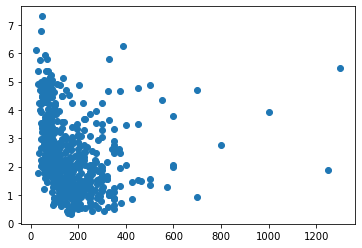

In [88]:
#graph the relationship between y_test and t_test_pred
plt.scatter(y_test, y_test_pred)
plt.show()